# Notebook Imports

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import boston_valuation as val

%matplotlib inline

# Gather Data

In [4]:
boston_dataset = load_boston() #This is the function that return dataset, and store it in boston_dataset

In [5]:
type(boston_dataset)

sklearn.utils.Bunch

In [6]:
#boston_dataset # -> Not really readable
dir(boston_dataset) #it gives you the list of attributes (as in python, that is, the objects? inside it)


['DESCR', 'data', 'feature_names', 'filename', 'target']

### Atribute:

> Atributes are the ML name for the features (indpt vble) of our points.  
Do not confuse with the Atribute of python

In [7]:
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [8]:
type(boston_dataset.data)

numpy.ndarray

In [9]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

In [10]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
# Actual prices in thousands (000s)
# As the price is what we want to determine, it is the TARGET 
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes

In [12]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target) called PRICE
data['PRICE'] = boston_dataset.target

If we want to glimpse the data:  

In [13]:
data.head() # The top rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.tail() # Rows at bottom of dataframe look like this:

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [15]:
data.count() # show us the number of row

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### Instance

> In ML it is refered as the number of datapoints or rows,  
where in Python it is an object -> data is an instance of the dataset

## Cleaning data - check for missing values

In [16]:
pd.isnull(data).any()
#isnull(data) shows you a table of all the entries (506*14) whether the values is null or not
#any() will resume this by columns:

# NOTE!!! 
# null != 0, null means there is no value where 0 is a value itself

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [17]:
#Above we used pandas modules, now we will resolve this problem with the dataframe instead
data.info()
#This shows more inf than before like number of columns, rows, name of the columns, if they have a null
# and the type of its entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

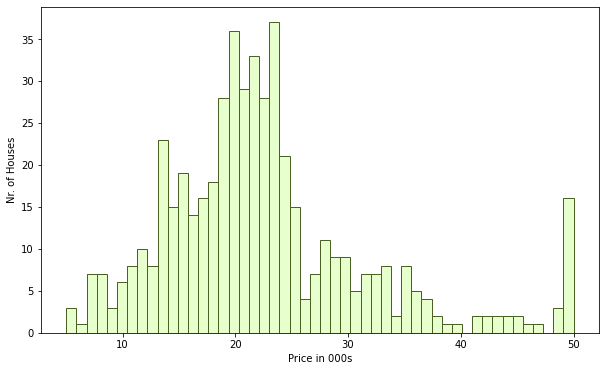

In [18]:
# Histogram

plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='#4B6123', color='#e7ffcc')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

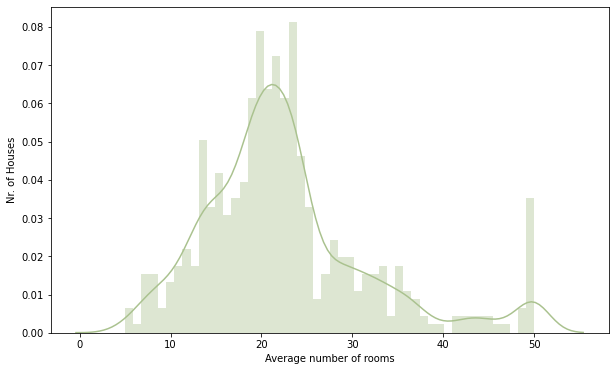

In [19]:
# Seaborn (a Python module based on matplotlip but with extra features)
# Seaborn distplot

plt.figure(figsize=(10, 6))
sns.distplot(data['PRICE'], bins=50, hist=True, kde=True, color = '#AAC28F')
    #bins is the number of rectangles
    #kde is an estimate of the Probability Density Function (PDF)

plt.xlabel('Average number of rooms')
plt.ylabel('Nr. of Houses')
plt.show()

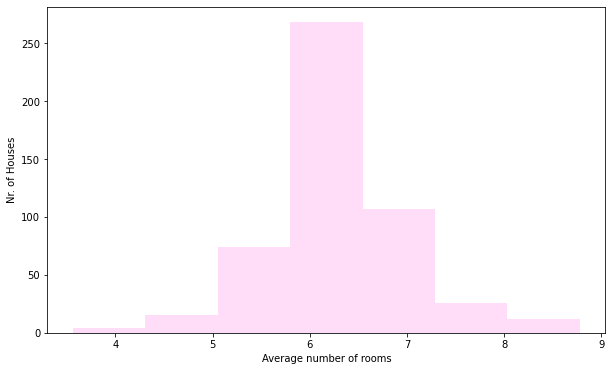

In [20]:
# Seaborn distplot

# Challenge

plt.figure(figsize=(10, 6))
sns.distplot(data['RM'], bins = 7, hist=True, kde=False, color='#FFABEF')
plt.xlabel('Average number of rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [21]:
#YO:
def mean_number_of_rooms():
    n = data['RM'].size
    sum = 1/n
    for i in range(n):
        sum += (data['RM'][i])/n
    return sum
    #print (mean_number_of_rooms())

#PROF:
data['RM'].mean()


6.284634387351787

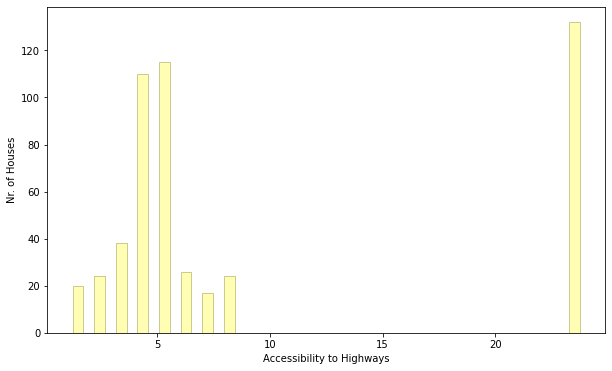

In [22]:
# Histogram

# Challenge: Create a meaningful histogram for RAD using matplotlib

plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins=24, ec='#CCCB8F', color='#FFFEB3', rwidth=0.5)
    #We used 24 bins because of the cell below
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [23]:
#data['RAD'] -> We can see that all the values are integers from 1 to 24, so to see the information better we use:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

The type of frecuency is:  <class 'pandas.core.series.Series'>
The type of the index is:  Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')


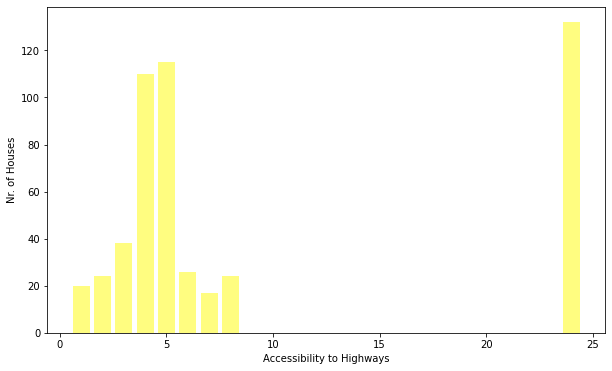

In [24]:
# Bar Chart

frequency = data['RAD'].value_counts()
print('The type of frecuency is: ',type(frequency))
print('The type of the index is: ',frequency.axes[0])
#frequency.index
#frequency.axes[0]  #These two do the same

plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency, color = '#FFFD80')
plt.show()

In [25]:
#Challenge: How many houses are near the river:

data['CHAS'].value_counts()

#These are DUMMY VARIABLES (1 or 0)

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [26]:
#data['PRICE'].min()
#data['PRICE'].max()
#data.min()
#data.max()
#data.mean()
#data.median()
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

> ## $ \rho _{XY} = corr(X,Y)$
> ## $ -1.0 \leq \rho _{XY} \leq +1.0 $


> We care for the:  
> - strength  
> - direction  
> - multicorrelated vbls (If they are really correlated and they are really dependent of the other)  


> 1 &#8594; Positive Correlation (if x grows, y grows)  
> -1 &#8594; Negative correlation (if x grows, y decreases)  
> 0  &#8594; No correlation  
> Decimals &#8594; Shows you the Strength of the correlation 

In [27]:
#data['PRICE'].corr(data['RM'])
#data['PRICE'].corr(data['PTRATIO'])

data.corr() # Pearson Correlation Coefficients, shift+Tab to see inf on how to change it
            # We can see that its symmetrical and the diagonal all 1's 
    
#Note that not all the correlations are reliable as we have used "Pearson Correlation Coefficients" that is
# for CONTINUOUS vbles whereas RAD (for ex) is a dummy vble (0 or 1)
# so we must care about how the individual features are measured, what units they're in and
# in what distribution of the data looks like for these features. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [28]:
mask_upper_triangle = np.zeros_like(data.corr()) #It creates an array (here a matrix) as the parameter but with all 0's
triangle_indices = np.triu_indices_from(mask_upper_triangle) #Indices of the top triangle
mask_upper_triangle[triangle_indices] = True # True =1
# mask_upper_triangle

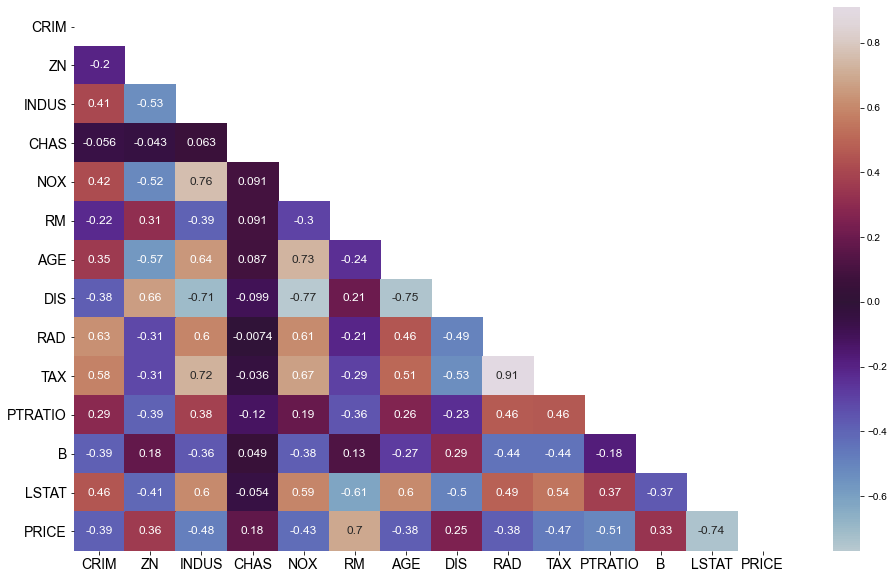

In [29]:
# Seaborn Heatmap

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), center = 0, cmap="twilight", mask=mask_upper_triangle, annot=True, annot_kws={"size": 12})
    #annot is to see the numbers of the matrix
    #annot_kws={"size": 12} This is a DICTIONARY that changes the size of the font
    #  {key: value}
sns.set_style('white')
    #This change the background color from gray to white
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
    #These are to change the fontsize of the axis
plt.show()

In [30]:
#In the last row we see the correlation with the TARGET (PRICE), and it can lead us to think 
# that maybe features like DIS do not really afect the target (0.25), and as this one is really correlated with 
# INDUS (-0.71), maybe it would be better to erase it and leave INDUS.
#Never the less, we are gonna see this better with the p-values and VIF.

In [31]:
# Once you have this, you have to check:
#    1. strenght & direction  -> Does the correlation make sense? 
#                                Take into acount if you have used the correct method (vbles CONTINOUOS or discrete)
#    2. the correlation with the TARGET (here, the Price) ->
#                                Which are the lowest? Do they highly correlate with other feature?
# And so, we have:
#    1. Identified strong correlations
#    2. TO DO: simplify by excluding irrelevant data
#    3. TO DO: Test for multicollinearity
#              As we have seen, there are vbles with a high correlation, 
#              so we need to check if there is multicollinearity as it is a PROBLEM
#
#
# IMPORTANT!!!     Correlation != Causation 
#    Everybody in 1800 who drank water is dead, but that does not imply that drinking water causes dead.
#
# Correlations look only into LINEAR RELATIONSHIPS, so to see better the relationship it's necessary to see a CHART

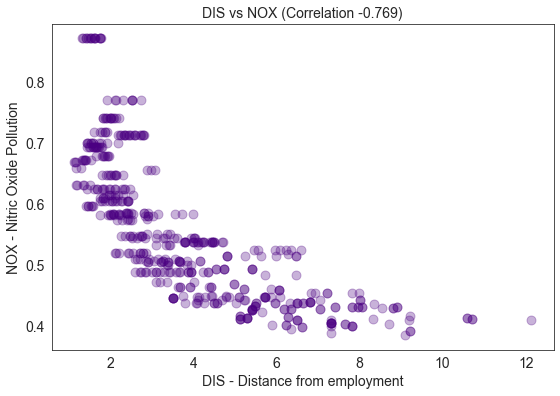

In [32]:
# Scatter

# Challenge: Picture the relationship between pollution and distance in your head
# Then create a scatter plot between DIS and NOX

nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x = data['DIS'], y = data['NOX'], s=80, color = 'indigo', alpha= 0.3)

#How to include a vble inside the chart:
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

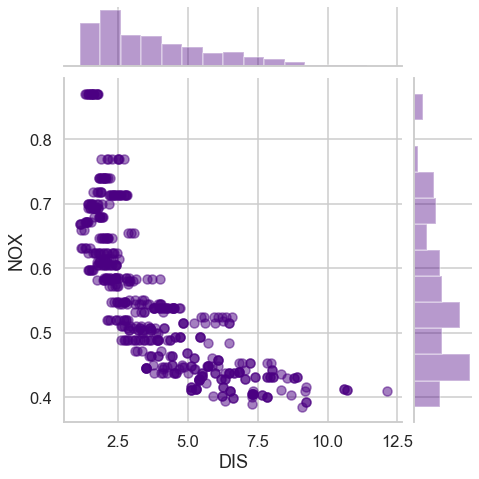

In [33]:
# Scatter in Seaborn

sns.set() #This is used to reset the styling to default
sns.set_style('whitegrid') # This allows us to choose kind of like a template style for the chart
sns.set_context('talk') #This put a template for the chart in respect how it is gonna be used
                        #In this case it makes the font bigger for you to present it to other people

sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
#UserWarning: The `size` parameter has been renamed to `height`; please update your code.
plt.show()


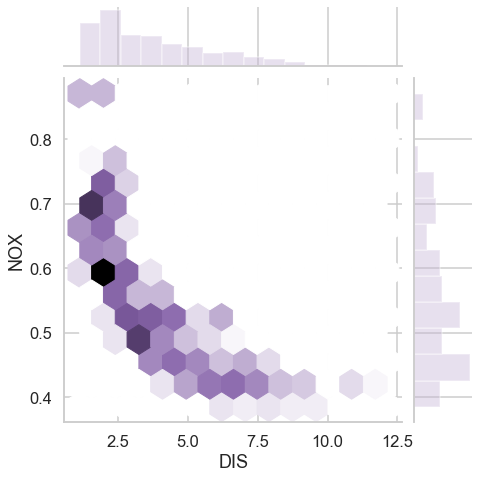

In [34]:
# Scatter in Seaborn vs2, kind: 

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', height=7, color='#C4B3D5')
plt.show()

### Outliers:  

> The outliers are the points that are far away from the majority, changing the correlation index <br />
We have to be careful with them

<Figure size 1440x360 with 0 Axes>

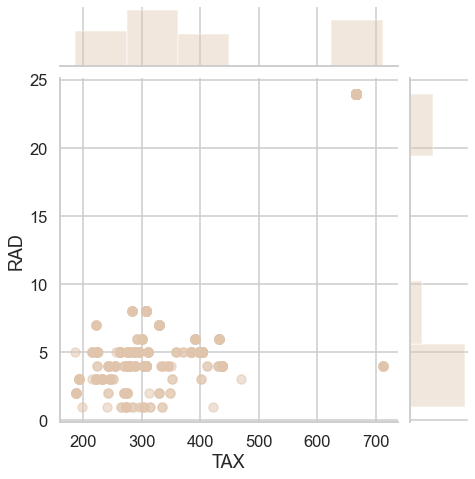

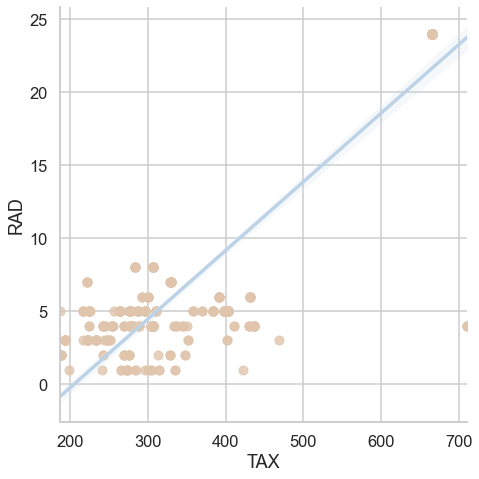

In [35]:
plt.figure(figsize=[20, 5])

#1st chart

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='#E0C5AC', joint_kws={'alpha':0.5})
plt.show()

#2nd chart: Linear Regression between our two features

sns.lmplot(x='TAX', y='RAD', data=data, height=7, scatter_kws={'color' : '#E0C5AC'}, line_kws={'color':'#BCD2E6'})
#plt.show()

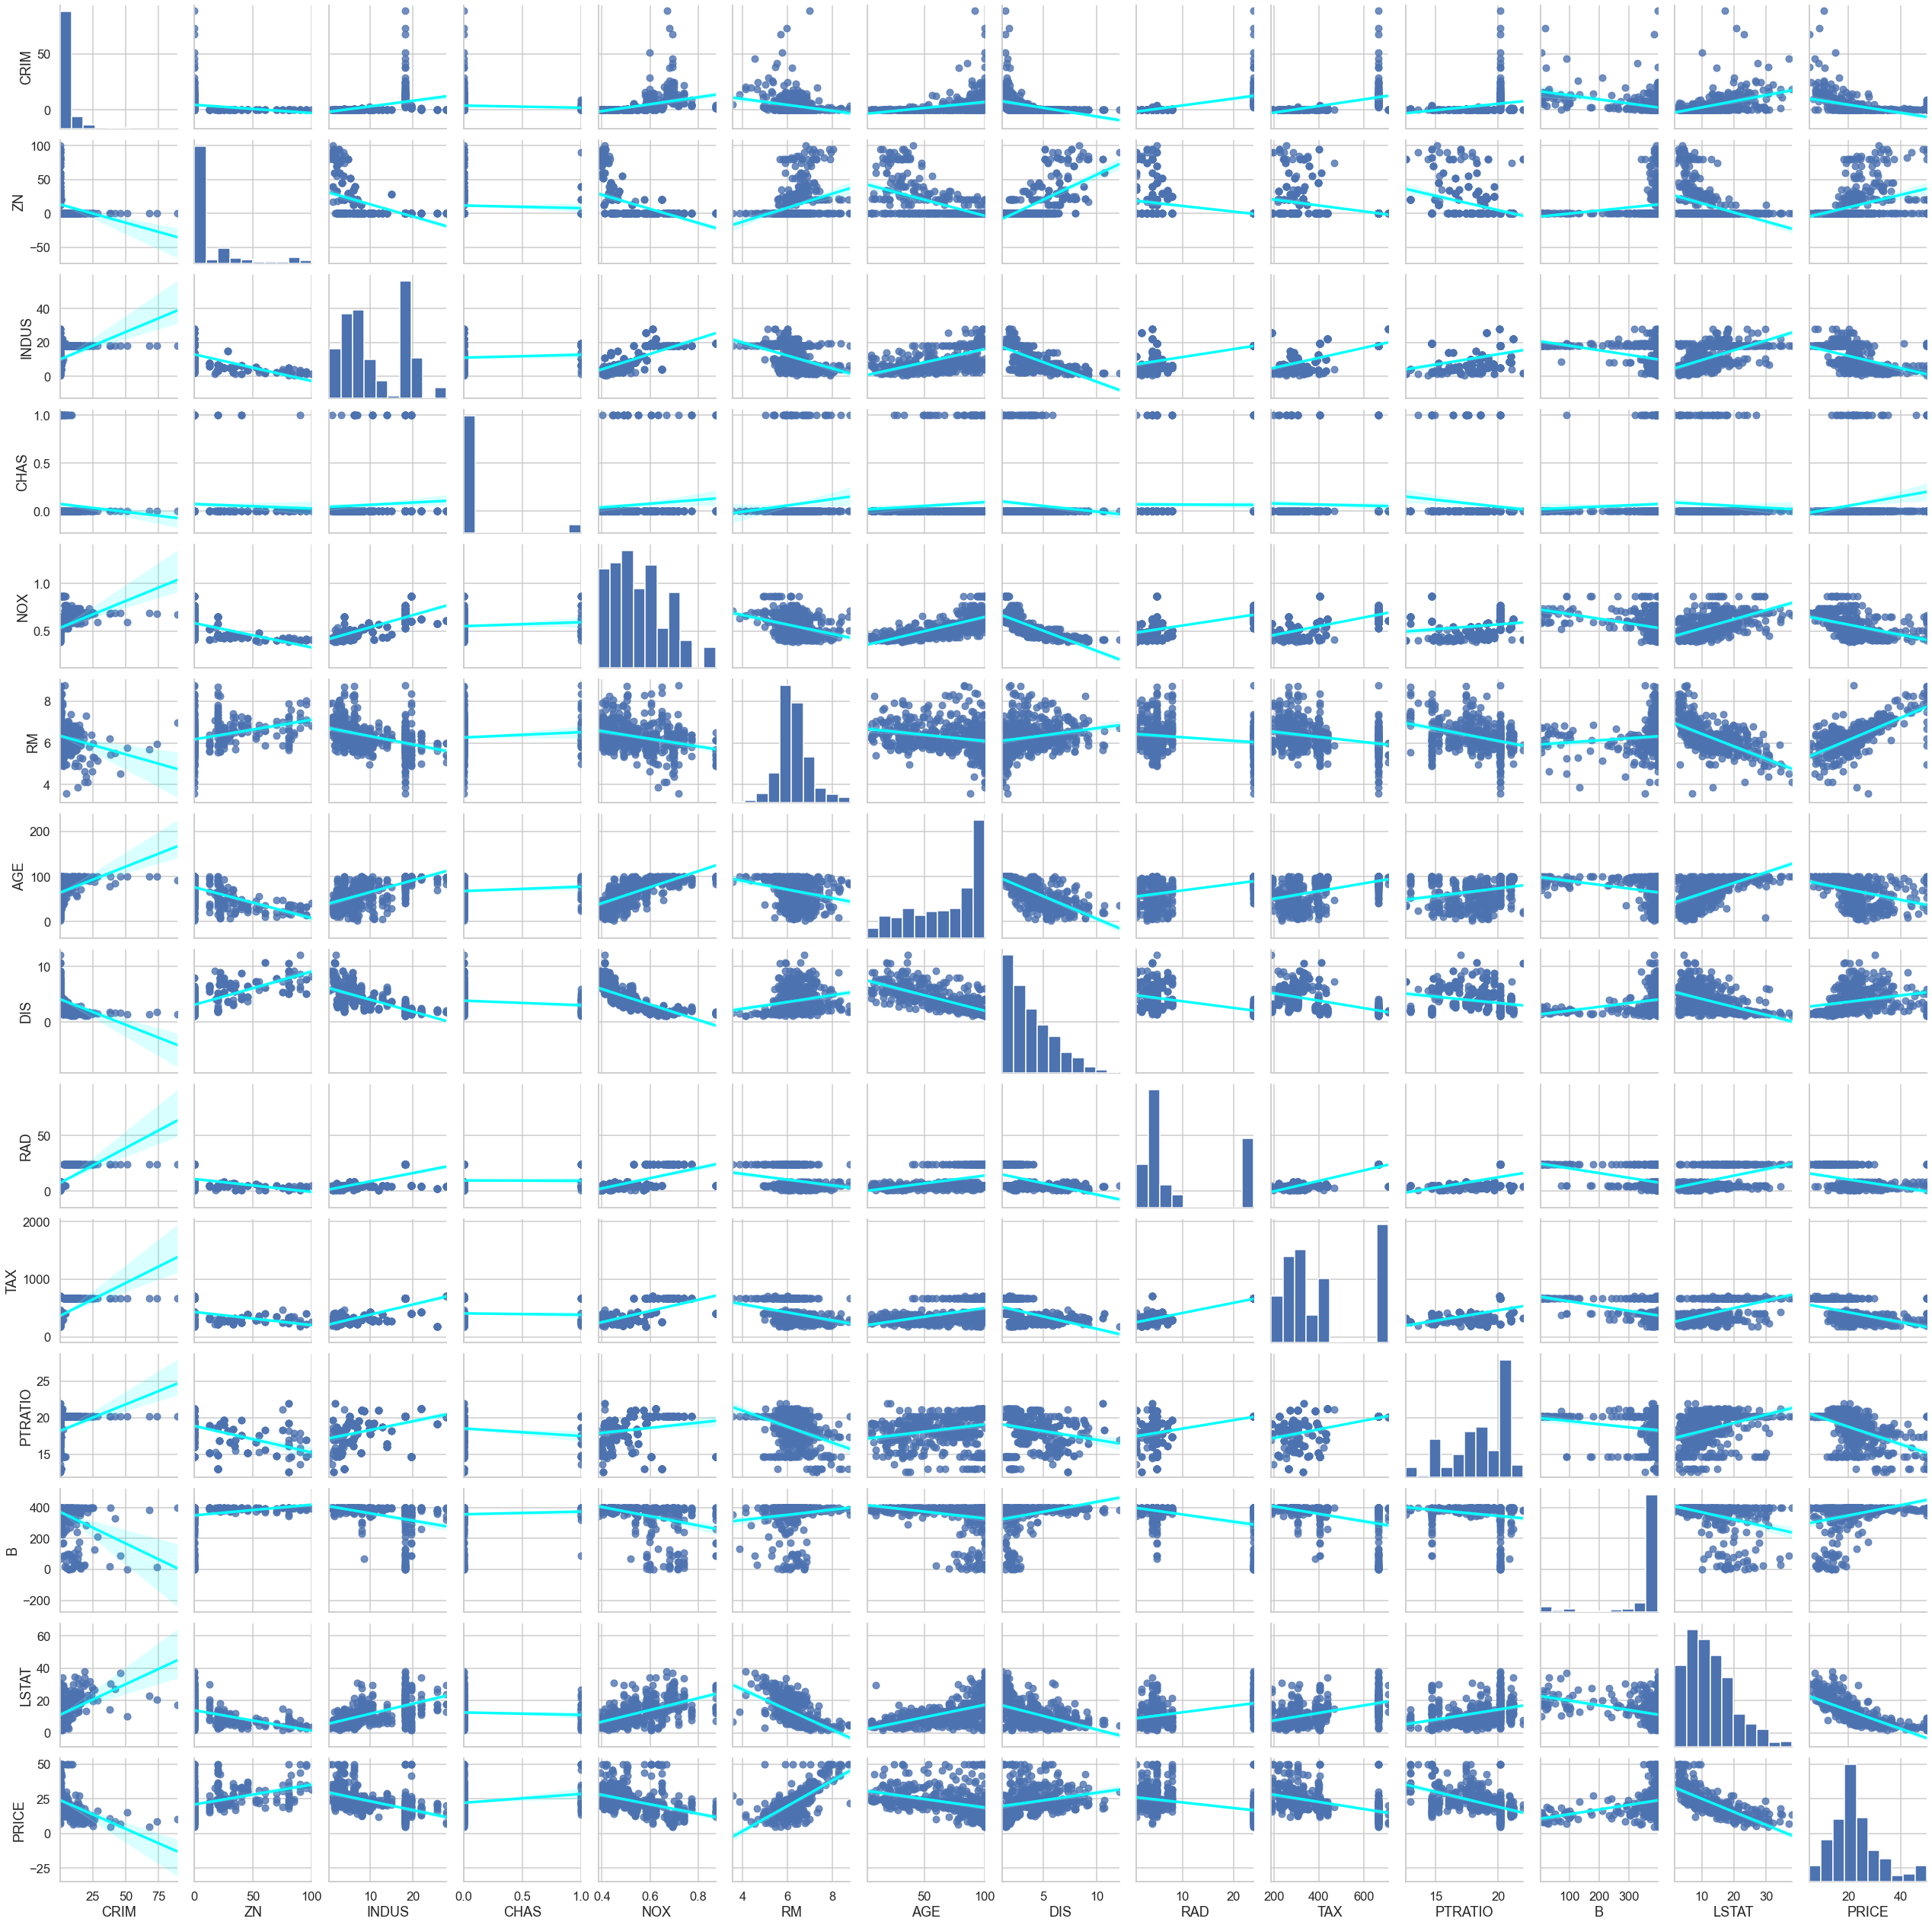

Wall time: 1min 36s


In [36]:
%%time
#This shows you how much time did it take to plot it
#It comes handy when you have to decide between 2 algorithms

# OPTION 1:
#sns.pairplot(data)
    #The diagonal show the histograms
    #The rest are the scatter plots
#plt.show()


# OPTION 2: The same as before but with the regression line
#  We have to change its color because it not it would be blue on blue
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

## Training & Test Dataset Split

In [37]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1) #We drop the column of Prices from the dataset

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

#We choose to train with the 80% of our samples and test our model with the other 20%
#As the function shuffles automatically, if we want to get the same results as the teacher
#  we need to choose the random seed: random_state=10


# % of training set
len(X_train)/len(features)

0.7984189723320159

In [38]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [39]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#These are tethas 1..13 of the equation:
#     y_predicted = PRICE_predicted = theta0 + theta1 * CRRIM + ... + theta13 * LSTAT 

#As we see the values, we can see that it is good the CHAS river, as bostonians are willing
#   to pay the double for it (1,975)
#And as the contaminations grows(NOX), the prices are lower (-16,27)


#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
    #We have been able to explain aprox 75% of the variance in our houses 
    # The r-squared is lower for the test as it hasn't been trained with it

    #DOUBT!!! I thougth that the r-squared should be 0? but here seems more like a % where 1 is the best

print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_) #Theta 0 

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations  


As we want to aproximate by lines, we can do transformations to our datas so they transform more into a line.  
> $Ex:$ &nbsp;&nbsp; if our data is like &nbsp; $e^{x}$, &nbsp; if we put &nbsp; $log{(e^{x})}$ &nbsp; we will have the line $x$, that is really easy to aprox by a line  


### Skew:   
> When the data is too high in the extreme.  
> We want it to be less than in the middle so it resenbles more to the NORMAL.

In [40]:
data['PRICE'].skew()

# We look to the skew be near 0

1.1080984082549072

In [41]:
y_log = np.log(data['PRICE'])
#We didn't import log from math as it does not accept data, but it is inside the numpy so perfect.

#y_log.tail()

In [42]:
y_log.skew()

-0.33032129530987864

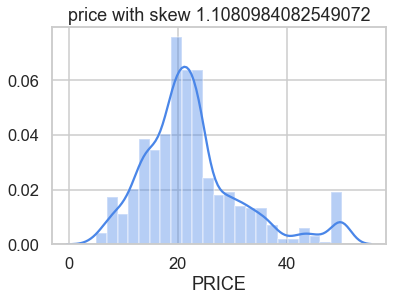

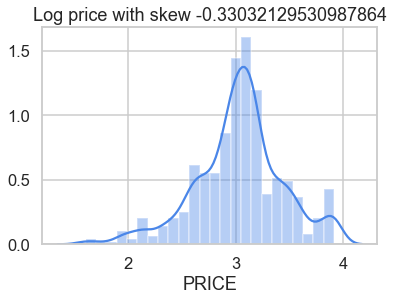

In [46]:
# Plot of the Price

#sns.distplot(data['PRICE'], color = '#B1FFAE')
sns.distplot(data['PRICE'], color = '#4a86e8')
skw = data['PRICE'].skew()
plt.title(f'price with skew {skw}')
plt.show()

# Plot of the Log Price 

sns.distplot(y_log, color = '#4a86e8')
#sns.distplot(y_log, color = '#95FFC6')
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

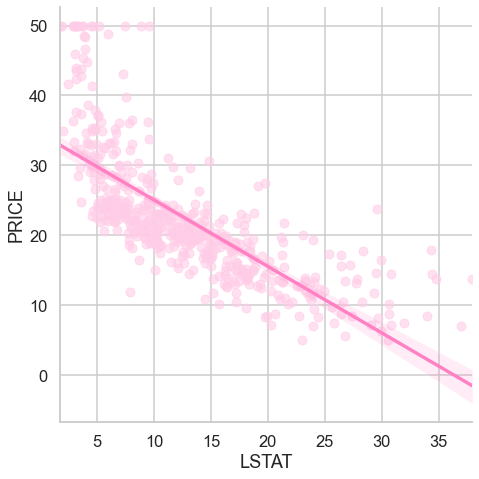

In [50]:
# Seaborn lmplot -> with the Linear Regression Line

sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'color' :'#ffcce7', 'alpha': 0.6}, line_kws={'color':'#FF80C3'})
plt.show()

#We can see that we would do a better aproach with a non linear relation

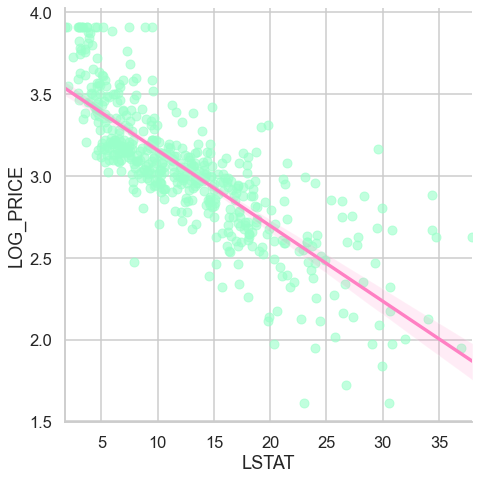

In [52]:
transformed_data = features  #We created it before, the dataset without PRICE
transformed_data['LOG_PRICE'] = y_log  #We also created it before

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'color':'#99FFC9','alpha': 0.6}, line_kws={'color':'#FF80C3'})
plt.show()

## Regression using log prices

In [162]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

# Now we have the ner Thetas for the equation:
#    // We use: theta_i  = ti
# log(PRICE) = estimated_log_price = t0 + t1 * CRIM + ... + t13 * LSTAT


# We can see that as we REDUCED the SKEW in the TARGET, we have a BETTER FIT
# with the R-SQUARED HIGHER

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [163]:
# Charles River Property Premium

#We dont need the math module as e is in numpy:
np.e**0.080475

#We the previous model they were willing to pay the double (1.974515), intead in this model:
# they are willing to pay 1083 $ more to live by the river

1.0838017512597784

## p values & Evaluating Coefficients

> Just because the feature has a theta associated doesn't mean it has significance in our model.  
> To look how significant our features are, we use the **p_values**.


> Let the threshold = 0.05, then:
> - p_value < 0.05  &#8594; result significant
> - p_value > 0.05  &#8594; result not statistically significant


> To calculate this p_values the scikit-learn's linear regression model isn't actually much help.  
> So to calculate the statistics for our regression we use the module:  
> >Statsmodels  
>
> We will use it to run our linear regression (getting the same results as we would with scikit-learn)  
> but, we will be able to pull up detailed statistics that we can't easily get with scikit-learn

In [164]:
# We need to add the intercept (theta0) so our regression tie out with scikit-learn:
X_incl_const = sm.add_constant(X_train) #X_include_constant

model = sm.OLS(y_train, X_incl_const) # Ordinary Least Squares (target_values, features)
# This will give us back a model object which we can then use to fit our regression
# Just as scikit-learn, this will give us a linear regression model which we store in model

results = model.fit() 
# This returns us our regression results, How do we take a look at them?

#results.params      # The coefficients
#results.pvalues     # The p_values

# To see them better we store then in a DataFrame:
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# We can see that we have 2 features (INDUS, AGE) that are not significant
# Maybe we can remove them from our model

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

### Multicollinearity: 
When 2 or more predictor vbls are highly related to one another.  
Therefore, they do not provide unique or independet information to the model.  


> Consequences:
>
> - *Loss of reliability*  
in the estimates of the effects for the individual features (in particular the affected)
>
> - *High variability in the coefficients estimates* (Thetas)  
for small changes in the model.  
For example, adding or removing a feature can have dramatic effects, like
switching the thetas values from positive to negative or vice versa.
>
> - The findings are strange or misleading or don't make sense  


In this section we are going to check it in a FORMAL WAY:  
looking at a **METRIC** to tell us if we have this problem or not.


We are gonna look at a statistic called:  

### Variance Inflation Factor (VIF) 
This statistic is a measure of collinearity among the features within a multiple regression.  
It will give us a number that we will compare to a threshold.


Studies believe this threshold is around 10:
> $VIF > 10$ &#8594; the vble associated would be considered problematic,  
> and would need a closer inspection.  

Note that other accademics that are a little more conservative think that the  
threshold should be around 5.

As an example:  
> How is the VIF calculated for one of the features (ex: TAX)?  

We are going to explain the TAX values as a linear combination of the other features:  

> $ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $
>  
>  
> $ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $  


In [165]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
# We put index 1 as we are not interested in the INTERCEPT but in the 1st feature: CRIM
# We put X_incl_const.values as X_incl_const is a dataFrame, but the function needs an numpy array
#type(X_incl_const)

#So the VIF for CRIM is:

1.7145250443932485

In [166]:
# Challenge: print out the number of columns in X_incl_const
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [167]:
# Challenge: write a for loop that prints out all the VIFs for all the features
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print('All done!')

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034
All done!


In [168]:
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [169]:
# INTERESTING!! How to create a list with the loop inside!!!

vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [170]:
# If we remember, we thought that erasing DIS might be possible as
# its correlation with the target was small (0.25), and big with the NDUS(-0.71), so maybe 
# it would be better to erase it, and leave INDUS.
#
# However, now we can see that the p_value of INDUS is 0.445 > 0.05, that is, not statistically significant,
# whereas the DIS is really significant (0.000 < 0.05)
#
# So, should we try removing INDUS from the model?
# It is not so easy, because even if its significant is really low, it may be contributing in smthg
# that the others features do not provide, adding some value and information.
#
# We are gonna see now how do we select features in the context of a regression model.
# We will look to a metric that will help our decisions:

## Model Simplification & the BIC

***BIC*** stands for Bayesian Information Criterion.  
> Its a way to measure complexity.  
> Its a number that allows us to compare two different models.  
>
> The lower, the better.  

You run a regression with MODEL 1, calculate its BIC.  
Then you run a regression with MODEL 2, calculate its BIC.  
Finally, you compare the BICs  

In [171]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478875
r-squared is 0.7930234826697582


In [172]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis =1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [173]:
# We can see that removing the vble, BIC becomes even more negative, so it improves, nice :-)
#
# But we also notice that the r-squared stays pretty much the same (0.79) and 
# that means that even though we have removed one feature from our dataset, it hasn't really impacted our fit
# in a material way. This is very encouraging :-) 

In [174]:
# Reduced model #2 excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.49934294224678
r-squared is 0.7918657661852815


In [175]:
#We create a new dataFrame concatenating the others
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


In [ ]:
# NaN: Not a Number
# We can see that even though we eliminated the columns, the coefficients stay pretty much the same, and that is good
# another confirmation that there was no multicollinearity.

## Residuals & Residual Plots

> Rigth now our equation looks like:  
> $$ log{(PRICE)} = \hat{y} =  \theta_0 + 	\theta_1 RM + ... +  \theta_11 LSTAT $$  
> Note that:  
> $$\hat{y} \neq y $$  
> $y$ is the actual value vs $\hat{y}$ that is the predicted value  
>

### The residual is:  
#### $$r = y - \hat{y}$$  
Note that we will have as many residuals as the points predicted  

> In the next lectures we are going to see that if there is a pattern in the residual points,  
> our model is not complete or well approximated.
> It can be a line, parabole, clusters, some outcasts ...  


> We want the points to look like a cloud centered in (0,0) without any particular symmetry.

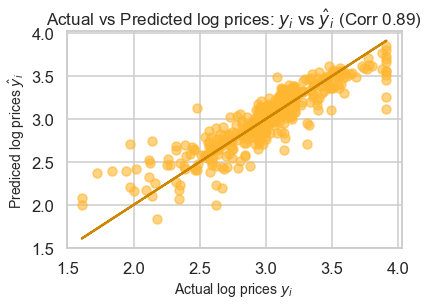

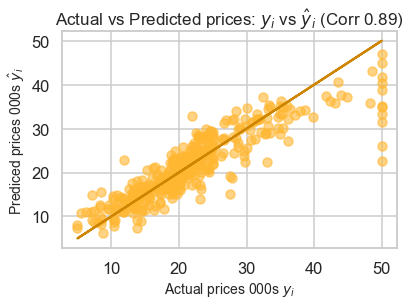

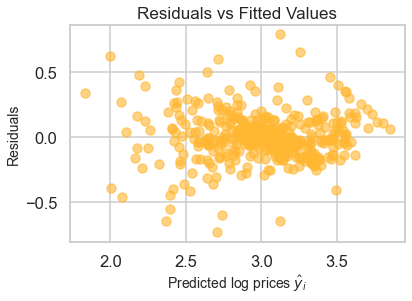

In [231]:
# Modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals

# residuals = y_train - results.fittedvalues
# residuals.describe()
#   We don't need to do the - as there we already have the residuals in:
# results.resid

# Graph of Actual vs. Predicted Prices

corr = round(y_train.corr(results.fittedvalues), 2)
# This is the correlation between y_hat and y, as it is high, it is good
plt.scatter(x=y_train, y=results.fittedvalues, c='#FFB732', alpha=0.6)
plt.plot(y_train, y_train, color='#CE8500')
# The line represents the perfect values

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='#FFB732', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='#CE8500')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='#FFB732', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared

reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

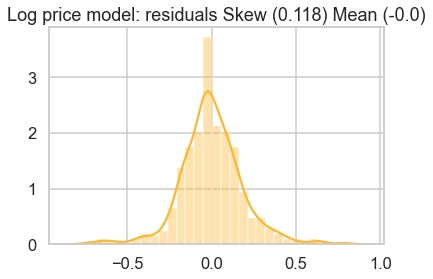

In [232]:
# Distribution of Residuals (log prices) - checking for normality
#  We want them to behave like the normal
 
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='#FFB732')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [179]:
# Challenge: Using the original model with all the features and normal prices generate:
# Plot of actual vs predicted prices (incl. correlation) using a different colour
# Plot of residuals vs. predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyse the results. 

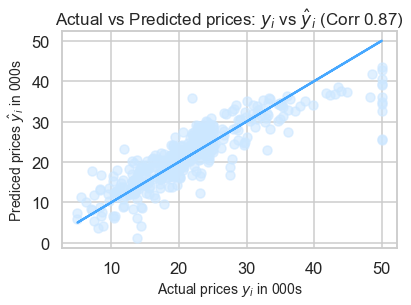

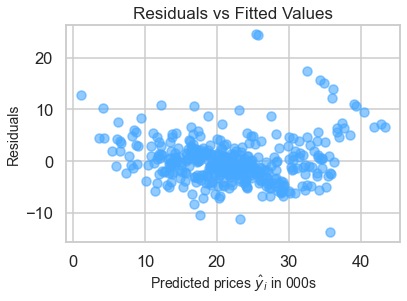

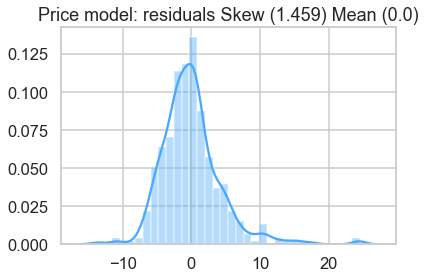

In [230]:
# Original  model: normal prices & all features

prices = data['PRICE'] # Use prices in 000's
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices


corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#CCE7FF', alpha=0.6)
plt.plot(y_train, y_train, color='#47A8FF')

plt.xlabel('Actual prices $y _i$ in 000s', fontsize=14)
plt.ylabel('Prediced prices $\hat y _i$ in 000s', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Plot of Residuals vs Predicted values 


plt.scatter(x=results.fittedvalues, y=results.resid, c='#47A8FF', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$ in 000s', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()


# Distribution of Residuals (prices in 000s) - checking for normality
 
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='#47A8FF')
plt.title(f'Price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


# Mean Squared Error & R-Squared

full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)


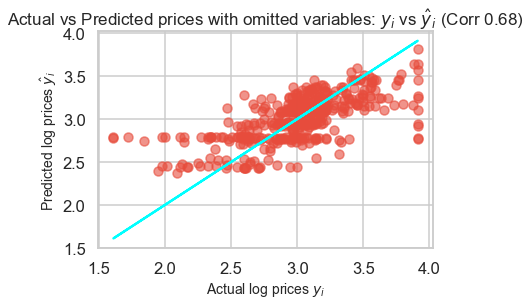

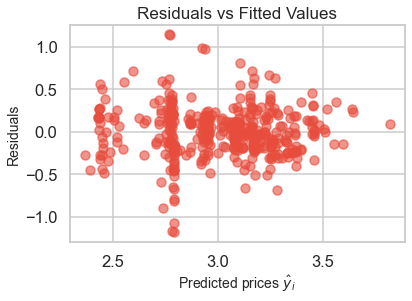

In [229]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared

omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [236]:
# Create a DataFrame

pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

# Note that R-squared does not have units, it always goes between 0 and 1.
# Note that MSE HAS UNITS!!!! so we have to transform it to compare our methods.
# Although they don't have the same units, lower values of MSE are better and 0 is the perfect fit.

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


## Range of our predictions

Once you have a predicted value, you can give a range to aproximated the estimation.  
> Ex: this house is estimated to have the value of 30000 + - 1243 dollars

### RMSE (Root Mean Square Error):  

> $ RMSE =  	\sqrt{MSE} =  	\sqrt{\frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2}$ 

> We often look towards the RMSE when we are interested in the predictive power of our models  
>
> To some extent we can use the RMSE to compare the models, as it is a very good measure of how accurately  
> the model predicts the target, as we can determine the width of the range with it  
>
>
> Look to the lecture 82, it explains really well the RSME and how do we get the range with the normal distribution.


In [237]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse)) # s.d. = standard deviation
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

# The mean +- 1 s.d. covers 68% of the observations
# The mean +- 2 s.d. covers 95% of the observations
# As the graphic that we are looking to be like the normal is the one were:
#     x = values of residuals
#     y = number of residuals with that value
# The mean = the mean of residuals, or where the peak of the graph is

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse) #You must do it in this order, not like the cell below
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [238]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 # Wrong! Add first. Transform afterwards. 

31453.778077746647